# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [3]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.



     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [5]:
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 

**a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.**

El método Mclust permite la agrupción basada en modelos, la clasificación y la estimación de densidad basada en el modelado de mezcla gaussiana finita.


    Entrada: Mclust(data, G=NULL, modelNames=NULL)
    - data = valor numérico, matriz o marco de datos de observaciones, en el ejemplo: "datos"
    - G = Un vector entero que especifica el número de componentes de la mezcla (grupos) para los cuales se debe calcular el BIC (Criterio de información bayesiano). En el ejemplo: 4
    - modelNames = Un vector de cadenas de caracteres que indica los modelos que se ajustarán en la fase EM de agrupamiento.

   

**b) Interprete y comente los resultados obtenidos.** 

La agrupación basada en modelos seleccionó un modelo con cuatro componentes, es decir, cuadtro agrupaciones. Modelo óptimo seleccionado VVV

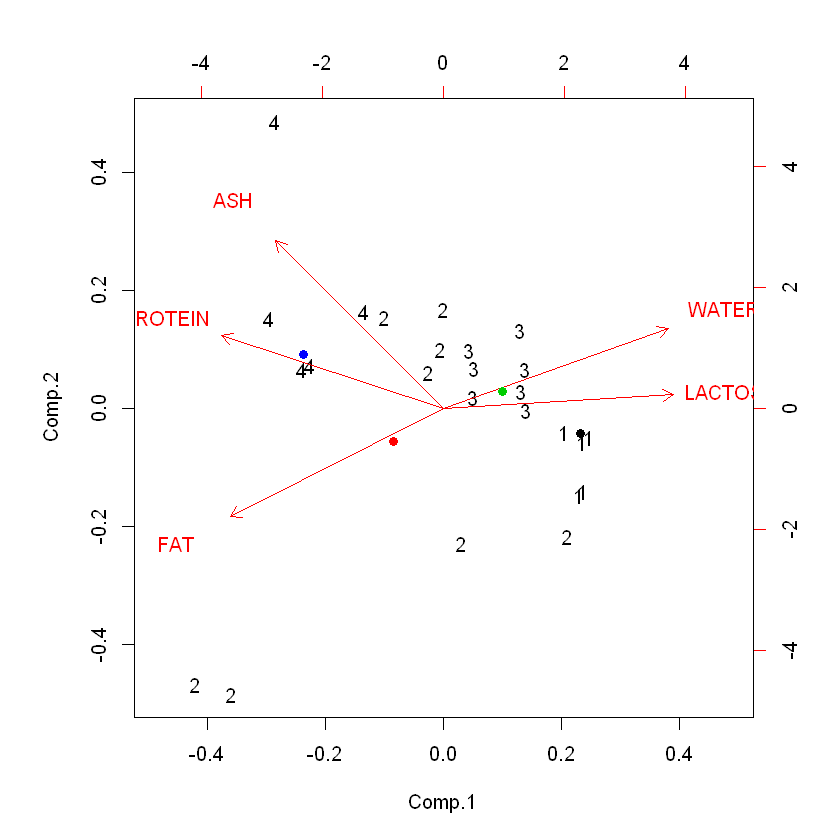

In [7]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 2 components: 

 log-likelihood  n df       BIC       ICL
      -176.5541 25 40 -481.8633 -481.8762

Clustering table:
 1  2 
18  7 

'Mclust' model object: (EVV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
84.69570,5.001479,4.969356,4.821686,0.7596701
61.41853,9.328688,24.053235,2.356288,1.1297551


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          1          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2

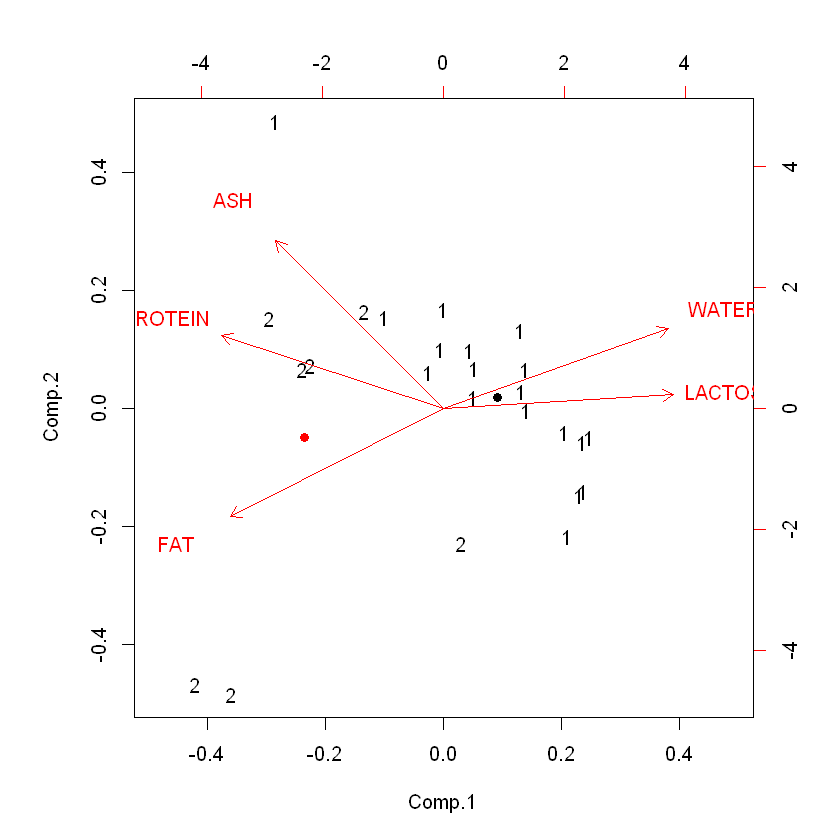

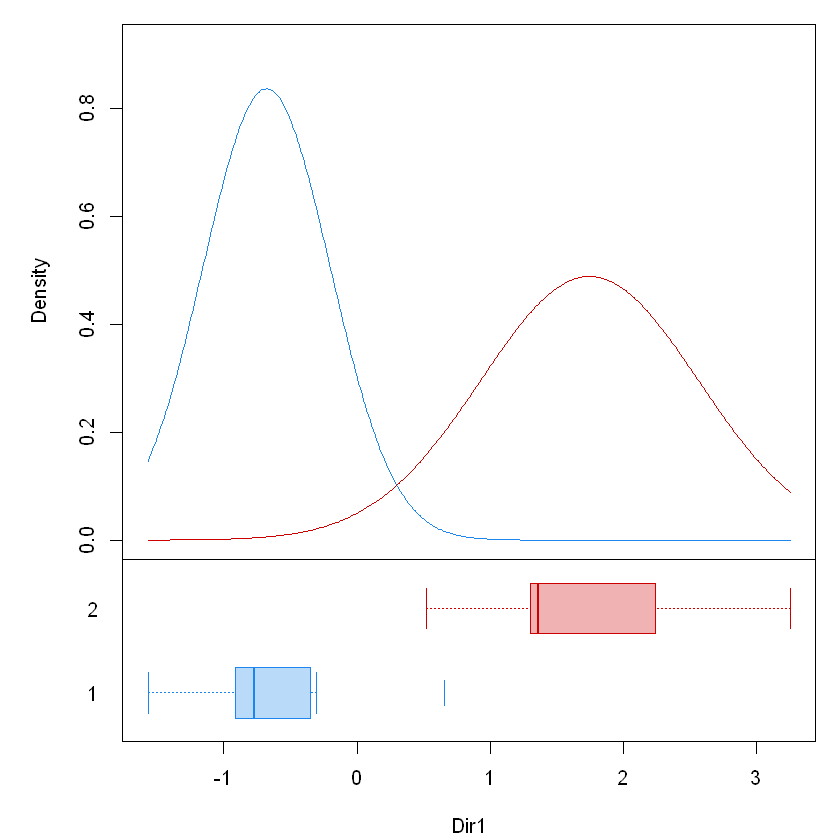

In [25]:
#Dos grupos

clus <-Mclust(datos, G=2)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


drmod <- MclustDR (clus, lambda = 1)
#summary(drmod)
plot(drmod, what = "contour")

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

----------------------------------------------------------------- 
Dimension reduction for model-based clustering and classification 
----------------------------------------------------------------- 

Mixture model type: Mclust (EEV, 3) 
        
Clusters  n
       1 14
       2  5
       3  6

Estimated basis vectors: 
           Dir1      Dir2
WATER   0.13512 -0.018276
PROTEIN 0.11468  0.159763
FAT     0.19788 -0.020608
LACTOSE 0.17445  0.079401
ASH     0.94816 -0.983571

               Dir1      Dir2
Eigenvalues  1.3556   0.21867
Cum. %      86.1096 100.00000

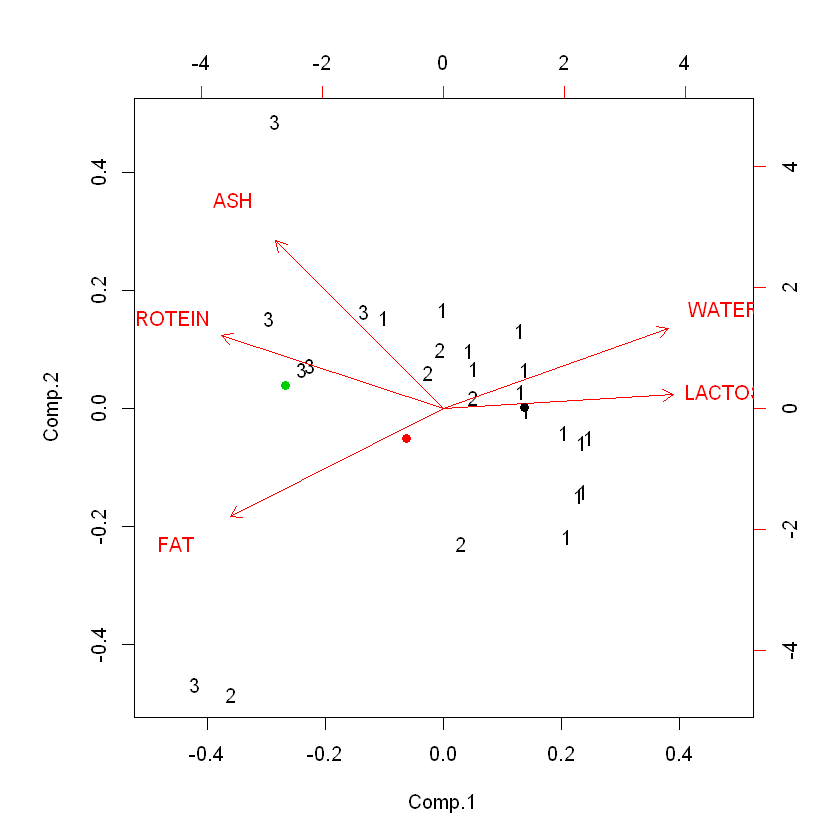

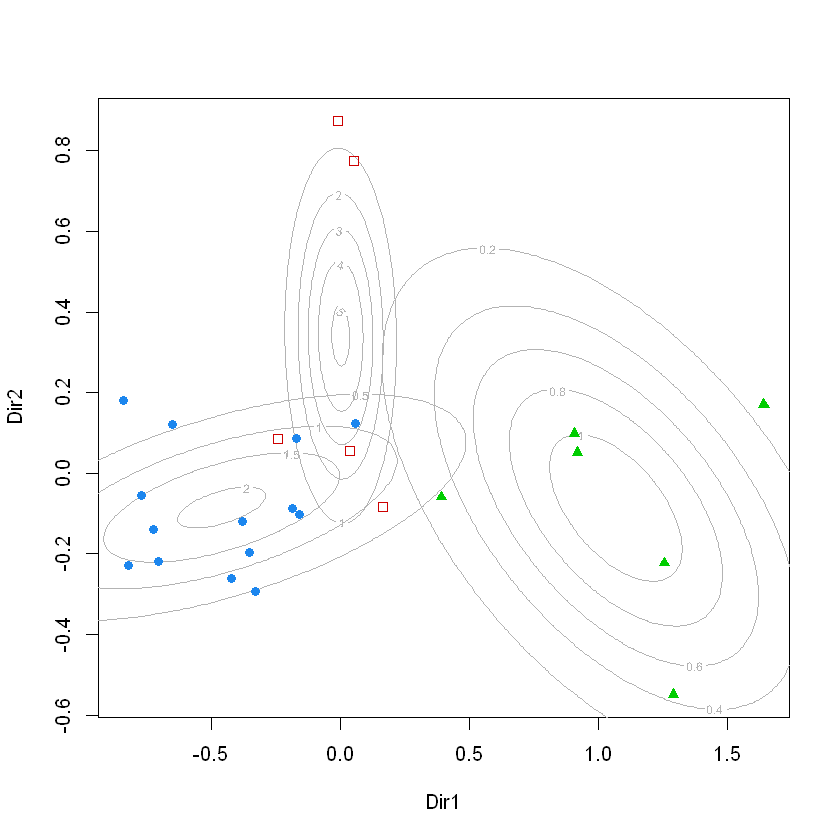

In [26]:
#Tres grupos

clus <-Mclust(datos, G=3)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


drmod <- MclustDR (clus, lambda = 1)
summary(drmod)
plot(drmod, what = "contour")

Los animales BUFFALO, GINEA_PIG, CAT, RABBIT, RAT, DEER, REINDEER, WHALE y SEAL fueron cambiados de grupo. 

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

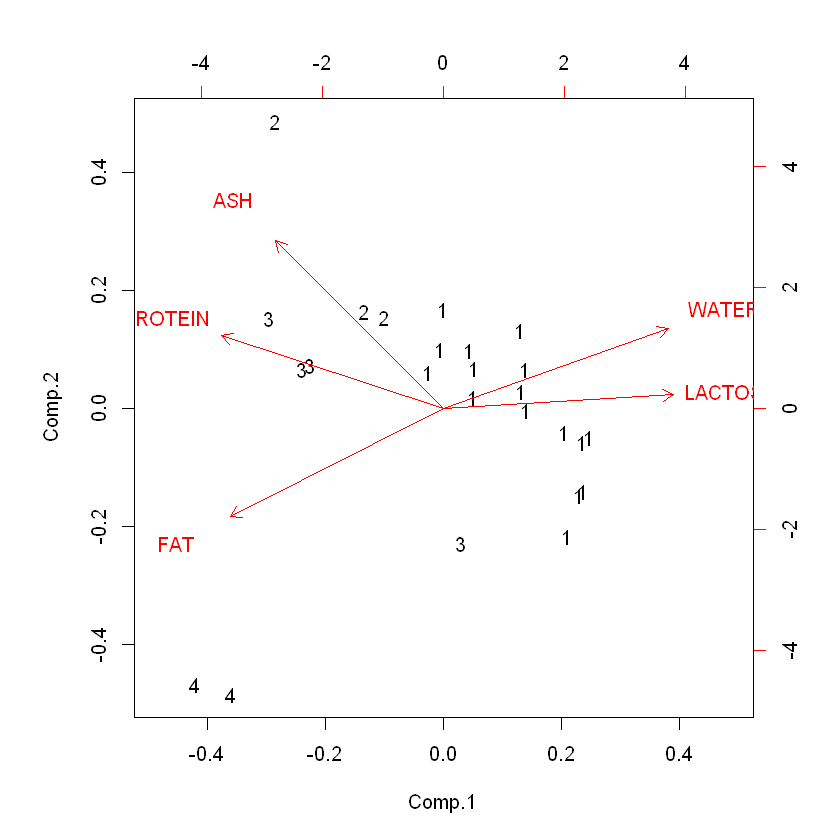

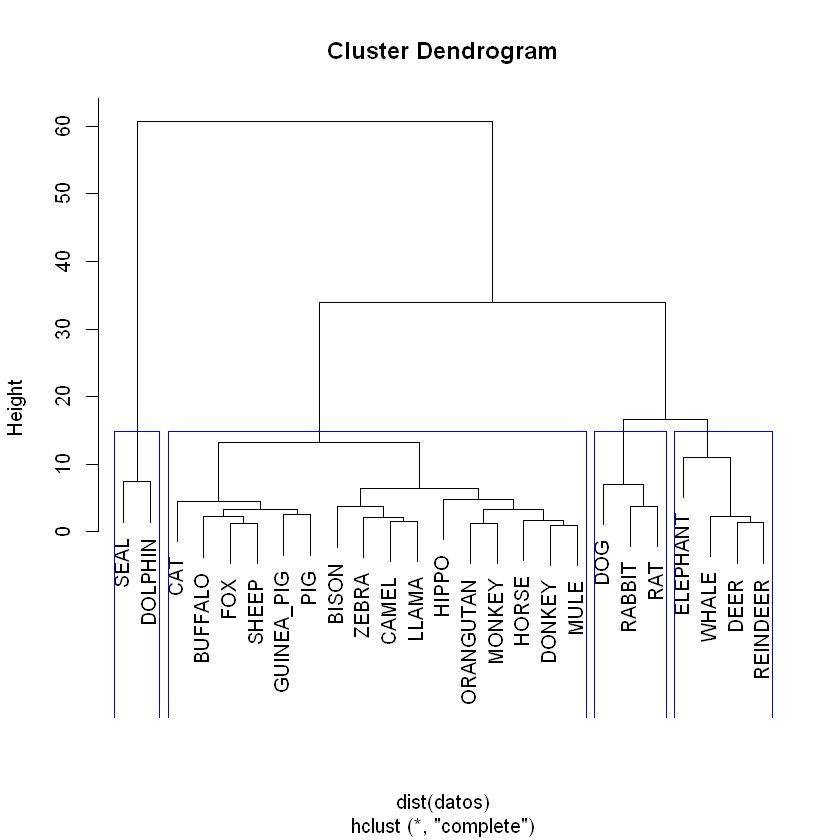

In [38]:
res3 <- hclust(dist(datos),method="complete")
biplot(res, xlabs= cutree(res3,4))
plot(res3)

rect.hclust(res3, k=4, border="blue")

Ejercicio 3: 

**a) Explique como funciona el método hclust, describa parámetros de entrada y salida.**

Esta función implementa el agrupamiento jerárquico. Realiza un análisis de agrupamiento jerárquico utilizando un conjunto de diferencias para los n objetos que se agrupan. Inicialmente, cada objeto se asigna a su propio grupo y luego el algoritmo procede de forma iterativa, en cada etapa uniendo los dos grupos más similares, continuando hasta que haya un solo grupo. En cada etapa, las distancias entre grupos se vuelven a calcular mediante la fórmula de actualización de disimilitud de Lance-Williams de acuerdo con el método de agrupación particular que se utiliza.

entrada: hclust(d, method="complete", members=NULL)
    - d = una estructura de disimilitud producida por dist.
    - method = El método de aglomeración a utilizar
    - members = NULL o un vector con longitud el número de observaciones

Tiene como salida un dendograma de tipo aglomerativo
    
**b) Interprete y comente los resultados obtenidos.**

Tiene como salida un dendograma de tipo aglomerativo. Utiliza el método aglomerado "complete". En el árbol resultado, se agrupan los 4 componentes. 

**c) Utilice otros parámetros en hclust y discuta como varían los resultados.**


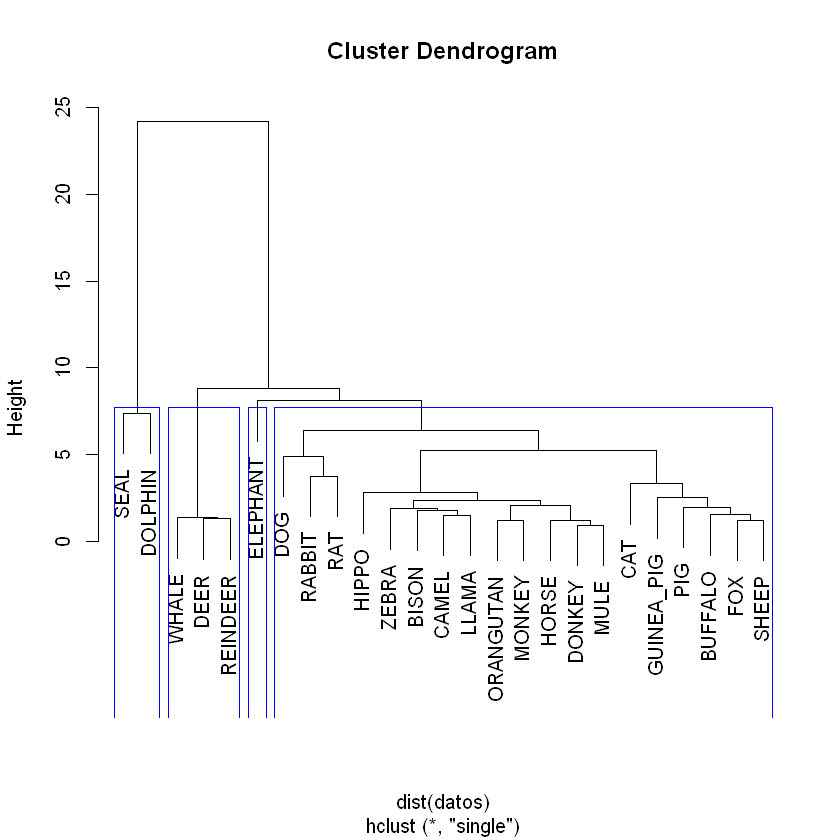

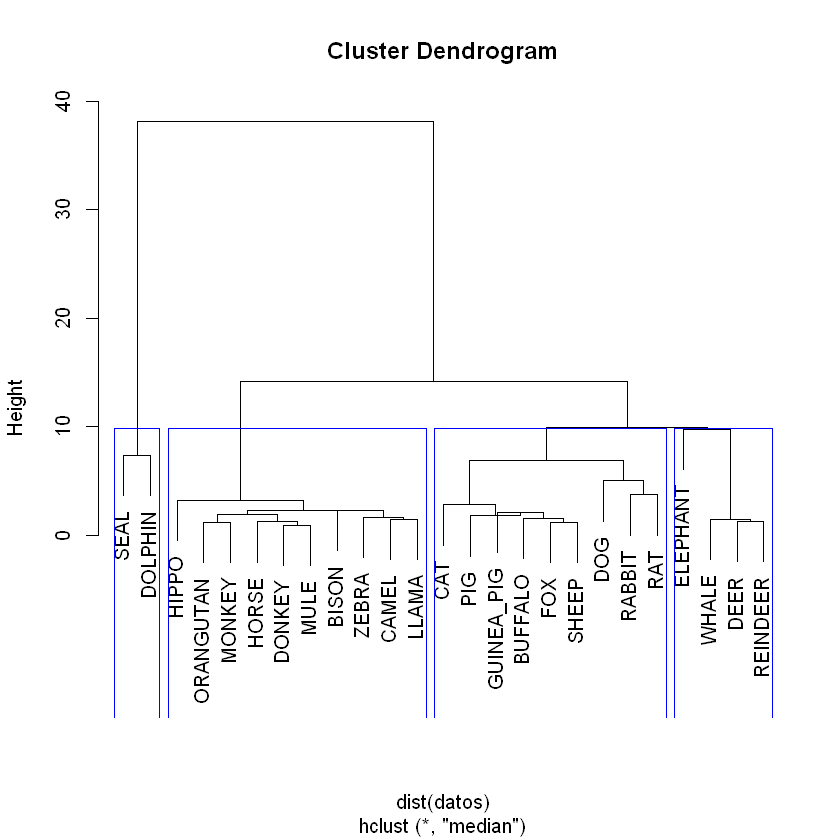

In [120]:
plot(hclust(dist(datos),method="single"))
rect.hclust(hclust(dist(datos),method="single"), k=4, border="blue")
plot(hclust(dist(datos),method="median"))
rect.hclust(hclust(dist(datos),method="median"), k=4, border="blue")


El primer gráfico, el método *single* calcula todas las diferencias en pares entre los elementos en el grupo 1 y los elementos en el grupo 2, y considera la menor de estas diferencias como un criterio de vinculación. Tiende a producir ramas más largas. El segundo gráficom el método *mean* minimiza la varianza total dentro del clúster. En cada paso, se fusionan el par de grupos con una distancia mínima entre grupos.

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.

b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [84]:
da<- read.csv("Iris.csv",sep=",",header=TRUE )
df<- da[2:5] #elimina x

In [91]:
especies<-da$Species
dis <- dist(df)

#GMM
clus <-Mclust(df, G=3)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
table(especies,clus$classification)

'Mclust' model object: (VEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.006000,3.428000,1.462000,0.246000
5.915044,2.777451,4.204002,1.298935
6.546807,2.949613,5.482252,1.985523


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

            
especies      1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50

In [94]:
#K-means

cl<-kmeans(df,3,iter.max=1000,nstart=10)
res <- princomp(df, cor=TRUE)
predict(res,cl$centers)
cl
table(especies,cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4
1,-2.224753,0.2889275,0.04283910,0.01834076
2,1.928128,0.5995427,-0.01958510,0.01105943
3,0.612400,-0.6004677,-0.02254389,-0.02156929


K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     6.850000    3.073684     5.742105    2.071053
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.15100 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

            
especies      1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

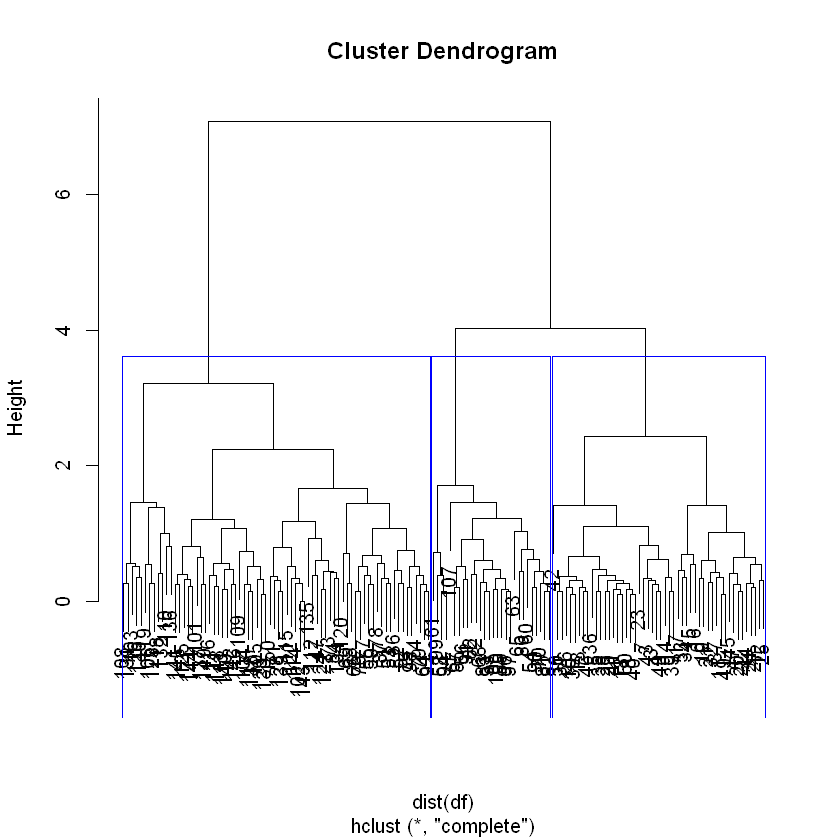

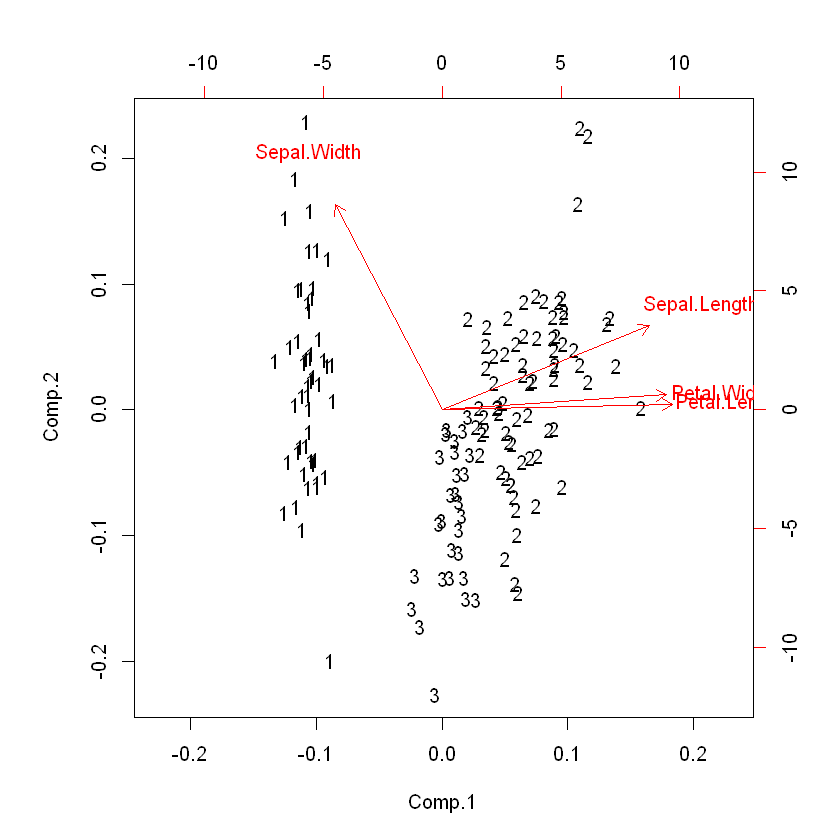

In [132]:
#Jerárquico

ger<- hclust(dist(df),method="complete")
plot(ger)
res <- princomp(df, cor=TRUE)
rect.hclust(ger, k=3, border="blue")

res1<-cutree(ger,3)
biplot(res,xlabs= cutree(ger,3))

In [136]:
# Purity function
cut<-cutree(hclust(dis),3)
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}



print("Purity GMM:")
ClusterPurity(especies,clus$classification)
print("Purity Jerárquico:")
ClusterPurity(especies,cut)
print("Purity K-keans:")
ClusterPurity(especies,cl$cluster)

[1] "Purity GMM:"


[1] 0.9666667

[1] "Purity Jerárquico:"


[1] 0.84

[1] "Purity K-keans:"


[1] 0.8933333

GMM posee mayor purity que los demás modelos, lo que lo hace ser el mejor. El método k-means varía dependiendo del method usado (en este caso "complete").